## PREDICT PEGI TAG ON A VIDEOGAME


Data cleaning solito, ho sostituito ai PEGI dei numeri usando Label encoder.
Inoltre utilizzando sparse_categorical_crossentropy come loss function ho otenuto buoni risultati. Usando Mse o altro avevo loss function che divergeva o orribili risultati. Invece usando questa loss fcn ottengo un 88% di predizioni corrette.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('Video_games_esrb_rating.csv')          # Import Dataset from .csv file

In [3]:
data.head()                                              # Show header

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['esrb_rating']= labelencoder.fit_transform(data['esrb_rating'])

In [5]:
#from sklearn.preprocessing import LabelBinarizer
#encoder = LabelBinarizer()
#data['esrb_rating']= encoder.fit_transform(data['esrb_rating'])

In [7]:
data['esrb_rating'].astype('category')

0       0
1       1
2       2
3       1
4       3
       ..
1890    2
1891    3
1892    0
1893    3
1894    0
Name: esrb_rating, Length: 1895, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [8]:
data.head() 

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3


In [9]:
#data['esrb_rating']=data['esrb_rating'].replace('E',0)
#data['esrb_rating']=data['esrb_rating'].replace('ET',0.1)
#data['esrb_rating']=data['esrb_rating'].replace('M',0.2)
#data['esrb_rating']=data['esrb_rating'].replace('T',0.3)

In [10]:
data.apply(lambda x: x.nunique(), axis=0)

title                       1895
console                        2
alcohol_reference              2
animated_blood                 2
blood                          2
blood_and_gore                 2
cartoon_violence               2
crude_humor                    2
drug_reference                 2
fantasy_violence               2
intense_violence               2
language                       2
lyrics                         2
mature_humor                   2
mild_blood                     2
mild_cartoon_violence          2
mild_fantasy_violence          2
mild_language                  2
mild_lyrics                    2
mild_suggestive_themes         2
mild_violence                  2
no_descriptors                 2
nudity                         2
partial_nudity                 2
sexual_content                 2
sexual_themes                  2
simulated_gambling             2
strong_janguage                2
strong_sexual_content          2
suggestive_themes              2
use_of_alc

In [11]:
# Drop non-numeric columns
data.drop(['title'],axis=1,inplace=True)

<AxesSubplot:>

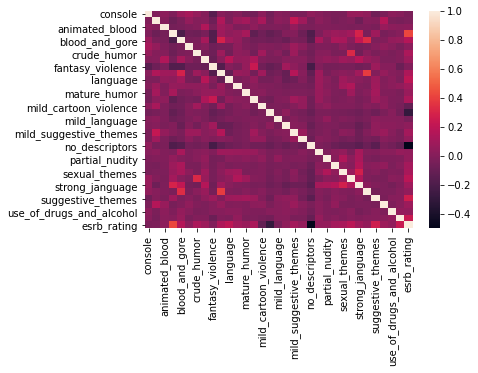

In [12]:
plt.figure(figsize=(6,4))                                  # Create a figure object with a specified figure size

sns.heatmap(data.corr())                                      # Plot Correlation Matrix as heatmap

In [12]:
from sklearn.model_selection import train_test_split            # Import train_test_split function from Scikit-Learn

In [14]:
# Convert columns of Pandas DataFrame to Numpy arrays

# Features
X = data.drop('esrb_rating',axis=1).values

# Target Variable
y = data['esrb_rating'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)         # Train-Test Split

In [16]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential                         # Import Sequential() to instatiate a Feed-forward NN object
from tensorflow.keras.layers import Dense                              # Import Dense() to instatiate fully-connected layer objects
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

In [17]:
model = Sequential()
model.add(Dense(16, input_shape=(32,), kernel_initializer='normal',activation='relu'))

model.add(Dense(units=4,activation='softmax'))
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
45/45 [==============================] - 0s 4ms/step - loss: 1.3506 - accuracy: 0.3906 - val_loss: 1.3067 - val_accuracy: 0.4008
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 1.2354 - accuracy: 0.4483 - val_loss: 1.1863 - val_accuracy: 0.4177
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.0855 - accuracy: 0.5243 - val_loss: 1.0413 - val_accuracy: 0.6941
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.9344 - accuracy: 0.7692 - val_loss: 0.9059 - val_accuracy: 0.7616
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.8025 - accuracy: 0.8086 - val_loss: 0.7883 - val_accuracy: 0.7785
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.8121 - val_loss: 0.6924 - val_accuracy: 0.7848
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.8163 - val_loss: 0.6218 - val_accuracy: 0.7975
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.8867 - val_loss: 0.3541 - val_accuracy: 0.8586
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8881 - val_loss: 0.3530 - val_accuracy: 0.8565
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8846 - val_loss: 0.3525 - val_accuracy: 0.8608
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8895 - val_loss: 0.3524 - val_accuracy: 0.8565
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8881 - val_loss: 0.3522 - val_accuracy: 0.8565
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8874 - val_loss: 0.3519 - val_accuracy: 0.8586
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8874 - val_loss: 0.3516 - val_accuracy: 0.8544
Epoch 

In [19]:
model_loss = pd.DataFrame(model.history.history)    # Save Training and Validation Loss in a Pandas DataFrame

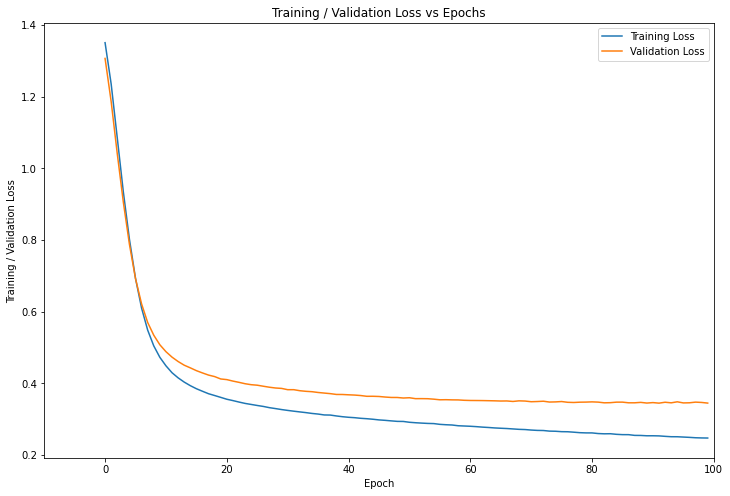

In [20]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

In [21]:
predictions = model.predict_classes(X_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 0, 1, 1, 1, 3, 2, 0, 1, 2, 2, 2, 0, 3, 1, 3, 3, 1, 2, 3, 3, 3,
       3, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 3, 0, 1, 0, 1, 3, 0, 3, 0,
       1, 1, 2, 1, 0, 2, 3, 3, 1, 1, 0, 2, 2, 3, 1, 3, 0, 2, 1, 3, 3, 2,
       0, 1, 2, 3, 0, 3, 1, 3, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 1, 3, 2, 1,
       3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3, 1, 2, 3, 3, 1, 1,
       3, 3, 0, 2, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 2, 1, 1, 2,
       3, 3, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 3, 3, 0, 3, 3, 0, 1, 2, 3,
       2, 3, 2, 0, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 3, 1, 1, 0,
       0, 3, 0, 2, 3, 0, 0, 0, 1, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3, 2, 3, 1,
       0, 2, 3, 3, 1, 3, 3, 0, 1, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 0, 2, 1,
       3, 0, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 3, 2, 2, 0, 3, 3,
       3, 2, 3, 3, 1, 3, 2, 0, 2, 2, 1, 0, 0, 3, 0, 3, 1, 0, 2, 3, 3, 3,
       0, 3, 1, 0, 3, 0, 2, 0, 2, 1, 1, 3, 3, 3, 0, 0, 2, 0, 3, 2, 0, 3,
       3, 3, 3, 2, 2, 3, 0, 2, 0, 0, 2, 3, 3, 3, 3,

In [22]:
pred_test = pd.DataFrame(y_test)

In [23]:
pred_tab=pd.DataFrame(predictions)

In [24]:
pred_df = pd.concat([pred_test,pred_tab],axis=1)
pred_df.columns = ['Test Y','Predicted']
pred_df

,Test Y,Predicted
0,1,1
1,0,0
2,1,1
3,3,1
4,1,1
...,...,...
469,2,2
470,3,3
471,2,2
472,1,1


In [25]:
from sklearn.metrics import classification_report, confusion_matrix     

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       124
           1       0.81      0.89      0.85        97
           2       0.87      0.82      0.84        92
           3       0.82      0.81      0.82       161

    accuracy                           0.87       474
   macro avg       0.87      0.87      0.87       474
weighted avg       0.87      0.87      0.87       474



In [27]:
print(confusion_matrix(y_test,predictions))

[[121   2   0   1]
 [  0  86   0  11]
 [  0   0  75  17]
 [  1  18  11 131]]


## EARLY STOPPING

In [28]:
from tensorflow.keras.callbacks import EarlyStopping                 # Import EarlyStopping method

In [141]:
model = Sequential()
model.add(Dense(16, input_shape=(32,), kernel_initializer='normal',activation='relu'))

model.add(Dense(units=4,activation='softmax'))
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [142]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)       # Define EarlyStopping object and assign it to variable "early_stop"

In [143]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])     # Fit NN model, including early stopping 

Epoch 1/400
42/42 [==============================] - 0s 9ms/step - loss: 1.3485 - accuracy: 0.4721 - val_loss: 1.3119 - val_accuracy: 0.4780
Epoch 2/400
42/42 [==============================] - 0s 2ms/step - loss: 1.2510 - accuracy: 0.5520 - val_loss: 1.2170 - val_accuracy: 0.6239
Epoch 3/400
42/42 [==============================] - 0s 1ms/step - loss: 1.1360 - accuracy: 0.7345 - val_loss: 1.1041 - val_accuracy: 0.7047
Epoch 4/400
42/42 [==============================] - 0s 1ms/step - loss: 1.0136 - accuracy: 0.7549 - val_loss: 0.9890 - val_accuracy: 0.7434
Epoch 5/400
42/42 [==============================] - 0s 1ms/step - loss: 0.8989 - accuracy: 0.7881 - val_loss: 0.8838 - val_accuracy: 0.7627
Epoch 6/400
42/42 [==============================] - 0s 2ms/step - loss: 0.7973 - accuracy: 0.8069 - val_loss: 0.7911 - val_accuracy: 0.7750
Epoch 7/400
42/42 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.8107 - val_loss: 0.7129 - val_accuracy: 0.7873
Epoch 8/400
4

42/42 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9118 - val_loss: 0.3468 - val_accuracy: 0.8770
Epoch 116/400
42/42 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9087 - val_loss: 0.3466 - val_accuracy: 0.8770
Epoch 117/400
42/42 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9118 - val_loss: 0.3445 - val_accuracy: 0.8770
Epoch 118/400
42/42 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9118 - val_loss: 0.3447 - val_accuracy: 0.8735
Epoch 119/400
42/42 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9103 - val_loss: 0.3489 - val_accuracy: 0.8717
Epoch 120/400
42/42 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9110 - val_loss: 0.3457 - val_accuracy: 0.8770
Epoch 121/400
42/42 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9103 - val_loss: 0.3468 - val_accuracy: 0.8770
Epoch 122/400

In [144]:
model_loss = pd.DataFrame(model.history.history)           # Save Training and Validation Loss in a Pandas DataFrame 

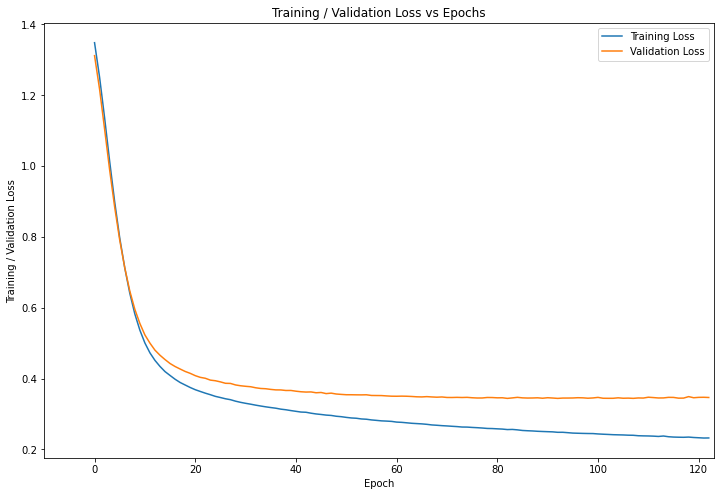

In [145]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

In [146]:
predictions = model.predict_classes(X_test) 
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.83      0.86      0.85       125
           2       0.88      0.84      0.86       105
           3       0.83      0.83      0.83       194

    accuracy                           0.88       569
   macro avg       0.88      0.88      0.88       569
weighted avg       0.88      0.88      0.88       569

[[142   2   0   1]
 [  1 108   0  16]
 [  0   0  88  17]
 [  1  20  12 161]]
